### Supervised Machine Learning alogrithms.                     - by books

X.Shape :(26, 2)


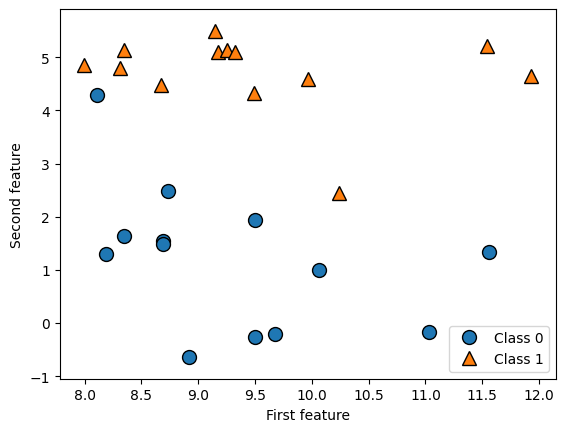

In [5]:
# Example of make_forge

import mglearn
import matplotlib.pyplot as plt

X , y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:,0],X[:,1],y)

plt.legend(["Class 0", "Class 1"], loc = 4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.Shape :{}".format(X.shape))


Text(0, 0.5, 'Target')

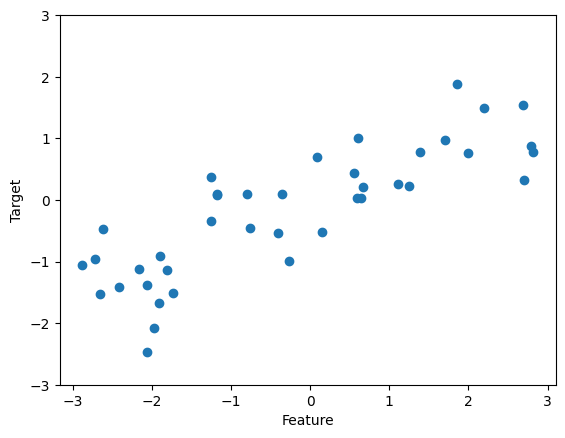

In [6]:
#  Another Example with the datasets "make_wave"

X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y , 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

#### Real Dataset of "breast_cancer"

In [12]:
import numpy as np
from sklearn.datasets import load_breast_cancer
cancer  = load_breast_cancer()

print("Cancer.keys () : \n {}".format(cancer.keys()))
print("Shape of cancer data : {}".format(cancer.data.shape))


Cancer.keys () : 
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Shape of cancer data : (569, 30)


In [ ]:
# For zip()
names = ['A', 'B', 'C']
marks = [90, 80, 70]

print(dict(zip(names, marks)))

print(tuple(zip([1,2,3], [10,20])))

{'A': 90, 'B': 80, 'C': 70}
((1, 10), (2, 20))


In [16]:
print("Sample counts per class :\n {}".format({ str(n): int(v) for n,v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per class :
 {'malignant': 212, 'benign': 357}


In [23]:
print("Feature names :\n {}".format(cancer.feature_names))

Feature names :
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
import sklearn.datasets

print(dir(sklearn.datasets))
# [name for name in dir(sklearn.datasets) if name.startswith('load_')]
[name for name in dir(sklearn.datasets) if name.startswith('make')]


['__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__getattr__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_arff_parser', '_base', '_california_housing', '_covtype', '_kddcup99', '_lfw', '_olivetti_faces', '_openml', '_rcv1', '_samples_generator', '_species_distributions', '_svmlight_format_fast', '_svmlight_format_io', '_twenty_newsgroups', 'clear_data_home', 'data', 'descr', 'dump_svmlight_file', 'fetch_20newsgroups', 'fetch_20newsgroups_vectorized', 'fetch_california_housing', 'fetch_covtype', 'fetch_file', 'fetch_kddcup99', 'fetch_lfw_pairs', 'fetch_lfw_people', 'fetch_olivetti_faces', 'fetch_openml', 'fetch_rcv1', 'fetch_species_distributions', 'get_data_home', 'load_breast_cancer', 'load_diabetes', 'load_digits', 'load_files', 'load_iris', 'load_linnerud', 'load_sample_image', 'load_sample_images', 'load_svmlight_file', 'load_svmlight_files', 'load_wine', 'make_biclusters', 'make_blobs', 'make_checkerboard', 'make_circles', 'make_classificat

['make_biclusters',
 'make_blobs',
 'make_checkerboard',
 'make_circles',
 'make_classification',
 'make_friedman1',
 'make_friedman2',
 'make_friedman3',
 'make_gaussian_quantiles',
 'make_hastie_10_2',
 'make_low_rank_matrix',
 'make_moons',
 'make_multilabel_classification',
 'make_regression',
 'make_s_curve',
 'make_sparse_coded_signal',
 'make_sparse_spd_matrix',
 'make_sparse_uncorrelated',
 'make_spd_matrix',
 'make_swiss_roll']

## 1. K - Nearest Neibhors (K-NN)

#### 1.1 K - Nearest classification

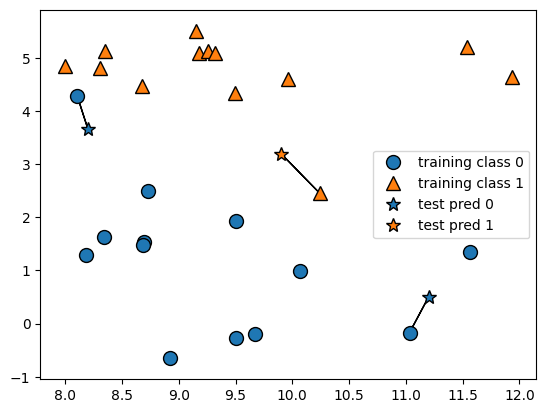

In [31]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

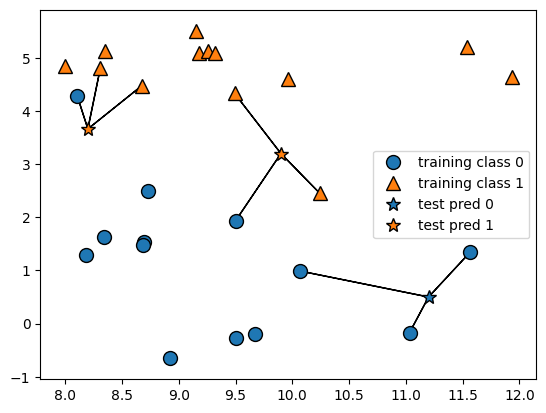

In [33]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X, y = mglearn.datasets.make_forge()

X_train , X_test, y_train, y_test = train_test_split(X,y,random_state=0)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

print("Test Set Prediction : {}".format(clf.predict(X_train)))
print("Test set Accuracy : {:.2f}".format(clf.score(X_test, y_test)))

Test Set Prediction : [0 0 1 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 0]
Test set Accuracy : 0.86


In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

print(knn.predict(X_test[:3]))


[0 0 2]


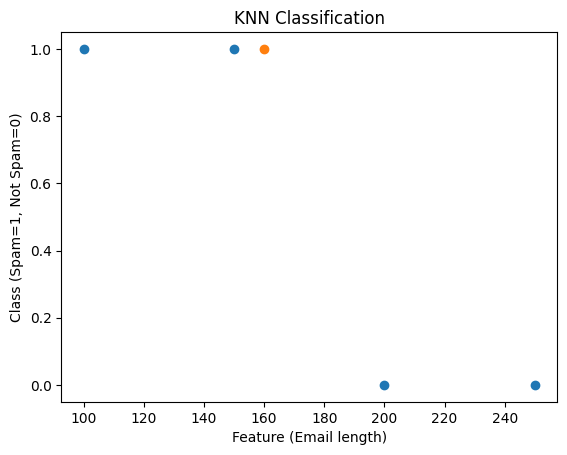

In [61]:
# ---------- KNN CLASSIFICATION GRAPH ----------
# Sample data (1D for easy visualization)
X_cls = np.array([100, 150, 200, 250]).reshape(-1, 1)
y_cls = np.array([1, 1, 0, 0])  # 1=Yes, 0=No

knn_cls = KNeighborsClassifier(n_neighbors=3)
knn_cls.fit(X_cls, y_cls)

# New point
x_new_cls = np.array([[160]])
y_pred_cls = knn_cls.predict(x_new_cls)

plt.figure()
plt.scatter(X_cls, y_cls)
plt.scatter(x_new_cls, y_pred_cls)
plt.xlabel("Feature (Email length)")
plt.ylabel("Class (Spam=1, Not Spam=0)")
plt.title("KNN Classification")
plt.show()

### 1.2 Analyzing K-NeighborsClassifier

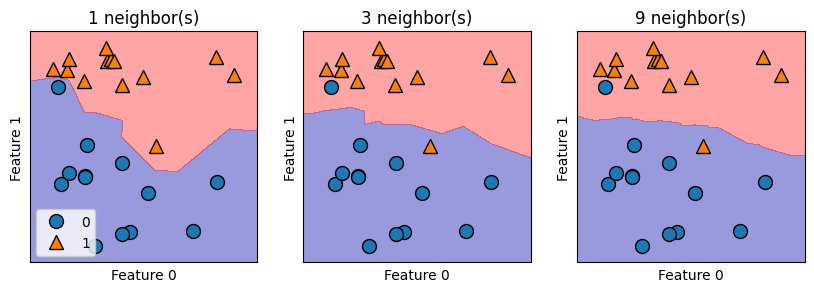

In [44]:
# for 2-D datasets

fig , axes = plt.subplots(1,3, figsize=(10, 3))
for n_neighbors , ax, in zip ([1,3,9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax = ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y, ax = ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend(loc=3)

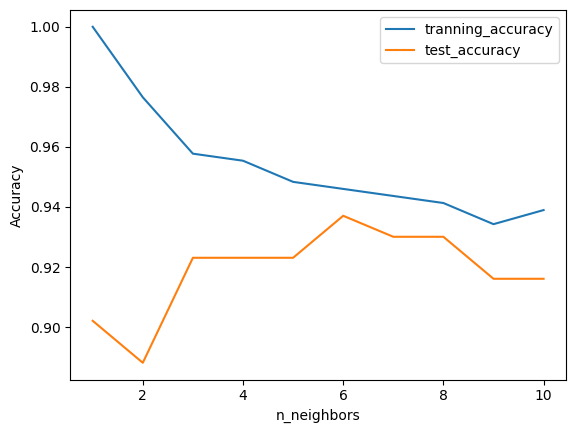

In [50]:
# breast_cancer data set 
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt 


cancer = load_breast_cancer()

X_train, X_test, y_train , y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

tranning_accuracy = []
test_accuracy = []

# try n_neighbors from 1 to 11

neighbors_setting  = range(1,11)
for n_neighbors in neighbors_setting:
    # built the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)

    # record the training set accuracy
    tranning_accuracy.append(clf.score(X_train, y_train))

    # record the generalization accuracy 
    test_accuracy.append(clf.score(X_test, y_test))

# now Plotting 

plt.plot(neighbors_setting, tranning_accuracy,label="tranning_accuracy")
plt.plot(neighbors_setting, test_accuracy, label="test_accuracy") 
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

#### 1.3 K-Neighbors regression

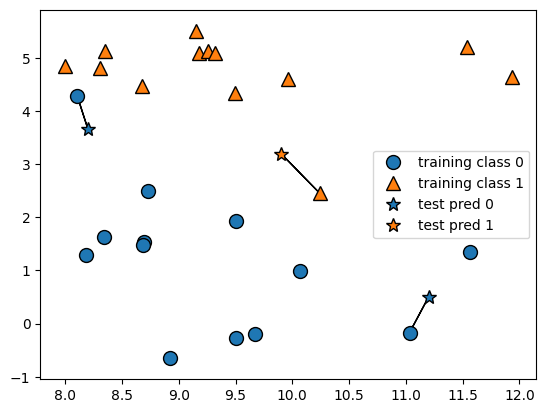

In [56]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

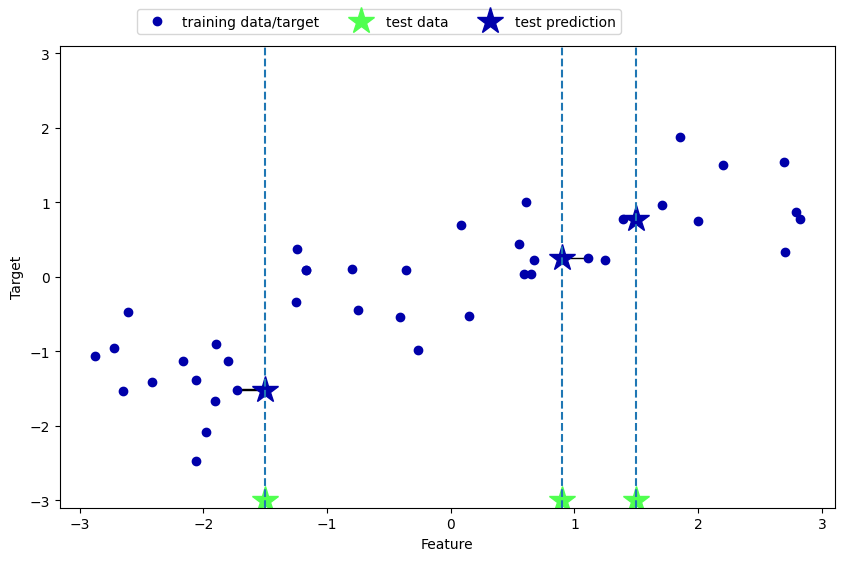

In [52]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

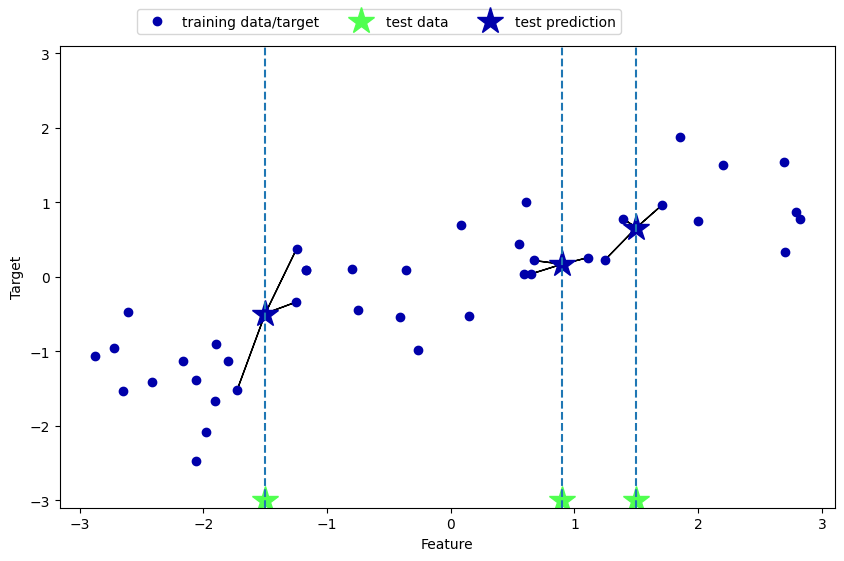

In [55]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

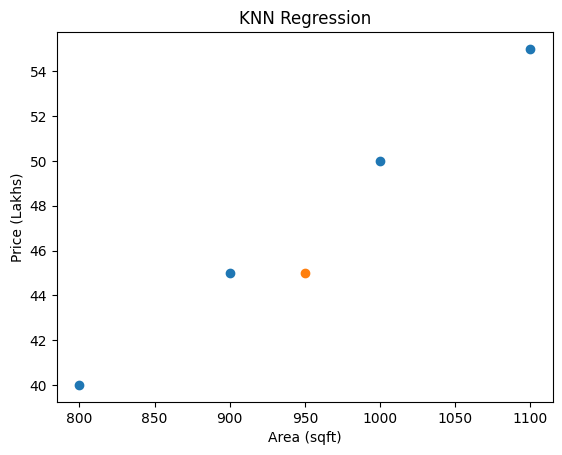

In [64]:
from sklearn.neighbors import KNeighborsRegressor

X_reg = np.array([800, 900, 1000, 1100]).reshape(-1, 1)
y_reg = np.array([40, 45, 50, 55])

knn_reg = KNeighborsRegressor(n_neighbors=3)
knn_reg.fit(X_reg, y_reg)

x_new_reg = np.array([[950]])
y_pred_reg = knn_reg.predict(x_new_reg)

plt.figure()
plt.scatter(X_reg, y_reg)
plt.scatter(x_new_reg, y_pred_reg)
plt.xlabel("Area (sqft)")
plt.ylabel("Price (Lakhs)")
plt.title("KNN Regression")
plt.show()

In [70]:
import mglearn.datasets
print(dir(mglearn.datasets))
[data for data in dir(mglearn.datasets) if data.startswith("load") ]

['Bunch', 'DATA_PATH', 'MinMaxScaler', 'PolynomialFeatures', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'load_boston', 'load_citibike', 'load_extended_boston', 'make_blobs', 'make_forge', 'make_signals', 'make_wave', 'np', 'os', 'pd', 'signal']


['load_boston', 'load_citibike', 'load_extended_boston']

In [73]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_wave(n_samples=40)
# split the wave datasets into a training and a test set 
X_train, X_test, y_train, y_test = train_test_split(X,y , random_state=0)
# instantiae the model  and set the number of neighbors to consider to 3

reg = KNeighborsRegressor(n_neighbors=3)

reg.fit(X_train, y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",3
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Uniform weights are used by default.See the following example for a demonstration of the impact ofdifferent weighting schemes on predictions::ref:`sphx_glr_auto_examples_neighbors_plot_regression.py`.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this isequivalent to using manhattan_distance (l1), and euclidean_distance(l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.",2
,"metric metric: str, DistanceMetric object or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.If metric is a DistanceMetric object, it will be passed directly tothe underlying computation routines.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [77]:
print("Test set predictions:\n{}".format(reg.predict(X_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [78]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


#### 1.4 Aanlyzing  the K-neighbors regressor

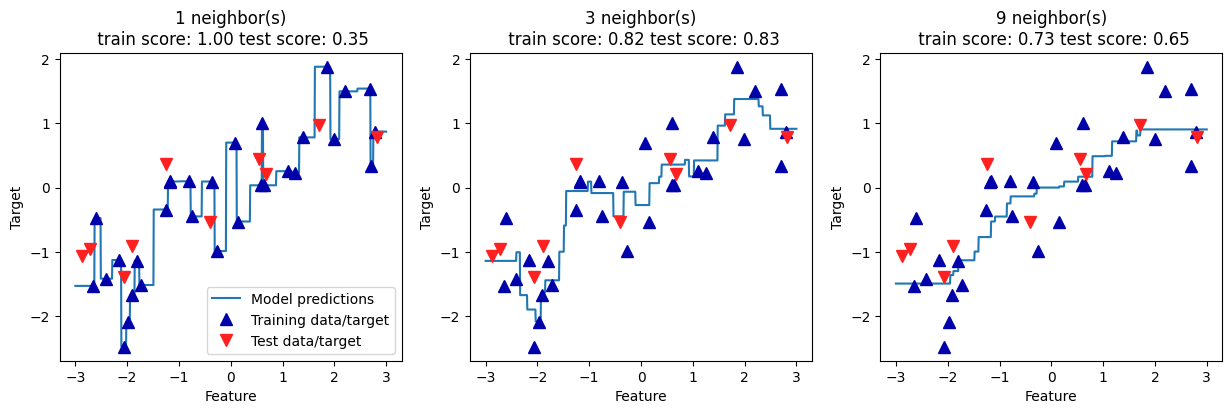

In [81]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
# make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title(
    "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
    n_neighbors, reg.score(X_train, y_train),
    reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target","Test data/target"], loc="best")